# 音訊數據

首先，我們需要更深入地了解我們的音訊數據。在這裡，我們將介紹一些音訊數據的關鍵概念和特點。

音訊信號是聲音通過空氣時產生的振動。對於音訊來說，當聲音從麥克風中捕捉時，它是以模擬形式存在的。模擬聲音通過在時間的一致間隔內進行取樣，轉換為數位聲音格式。每秒記錄的音訊數據點數稱為「取樣率」。

- 取樣率越高，聲音品質越好。但在某一點之後，人耳無法察覺到差異。
- 平均聲音取樣率為48千赫茲（KHz），即每秒48,000個樣本。我們在這個模組中使用的數據集的取樣率為16千赫茲（KHz），所以我們的取樣率是16,000。

<img alt="顯示音訊聲波的圖表。" src="images/2-understand-audio-data-1.png" align="middle" />

當音訊被取樣時，聲音的「頻率」是聲波重複自身的次數每秒。而「振幅」則表示聲音的音量大小。我們可以使用取樣率和頻率，以視覺方式呈現信號。這個視覺信號可以被表示為「波形」，即以圖形格式呈現的信號在時間上的表示。音訊可以以不同的通道記錄。例如，立體聲錄音有兩個通道，右聲道和左聲道。

現在讓我們花一些時間來理解如何解析一個文件。例如，如果您有較長的音訊文件，您可能希望將其分割成音訊的幀或部分，以便進行個別分類。對於這個數據集，我們不需要設定任何音訊樣本的幀，因為每個樣本只有一秒和一個單詞。另一個處理步驟可能是「偏移」，這表示從文件開始到開始載入數據的幀數。

## Get set up with TorchAudio

TorchAudio is a library that is part of the PyTorch ecosystem. It has I/O functionality, popular open datasets, and common audio transformations that we'll need to build our model. We will use this library to work with our audio data.

Let's get started! First, we'll import the packages needed:

## 安裝並配置 TorchAudio

TorchAudio 是 PyTorch 生態系統的一部分。它具有 I/O 功能、流行的開放數據集以及我們構建模型所需的常見音訊轉換。我們將使用這個庫來處理我們的音訊數據。

讓我們開始吧！首先，我們需要導入所需的套件：

In [1]:
!pip install -r https://raw.githubusercontent.com/MicrosoftDocs/pytorchfundamentals/main/audio-pytorch/install-packages.txt


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# import the packages
import os
import torchaudio
import IPython.display as ipd
import matplotlib.pyplot as plt

## Get the speech commands dataset

PyTorch has a variety of sample datasets available, which is helpful when you're trying to learn and play around with different audio models. We will use the speech commands sample dataset, and download the full dataset in a local directory. Note that we're only using the `yes` and `no` classes to create a binary classification model.

## 獲取語音命令數據集

PyTorch 提供了多種示例數據集，這在嘗試學習並嘗試不同音訊模型時非常有幫助。我們將使用語音命令的示例數據集，並下載完整數據集到本地目錄。請注意，我們只使用「是」（yes）和「否」（no）兩個類別來建立一個二元分類模型。

### Create a data folder

In [4]:
default_dir = os.getcwd()
folder = 'data'
print(f'Data directory will be: {default_dir}\\{folder}')

if os.path.isdir(folder):
    print("Data folder exists.")
else:
    print("Creating folder.")
    os.mkdir(folder) 

Data directory will be: C:\Users\eddie\GitHub\Deep-Learning\PyTorch\SelfLearning\data
Data folder exists.


### Download the dataset to the data folder

We'll use `torchaudio` to download the dataset files to a local folder.  PyTorch provides multiple sample image, text, and audio datasets. We'll be using the `SPEECHCOMMANDS` dataset from the `torchaudio` library.

In [5]:
trainset_speechcommands = torchaudio.datasets.SPEECHCOMMANDS(f'./{folder}/', download=True)

100%|██████████| 2.26G/2.26G [08:21<00:00, 4.85MB/s] 


### Visualize the classes available in the dataset

There are 36 audio classes in the speech commands dataset, each sampled at 16 KHz. Let's print the different commands available. The two classes we'll be using are the `yes` and `no` commands.

In [6]:
os.chdir(f'./{folder}/SpeechCommands/speech_commands_v0.02/')
labels = [name for name in os.listdir('.') if os.path.isdir(name)]
# back to default directory
os.chdir(default_dir)
print(f'Total Labels: {len(labels)} \n')
print(f'Label Names: {labels}')

Total Labels: 36 

Label Names: ['backward', 'bed', 'bird', 'cat', 'dog', 'down', 'eight', 'five', 'follow', 'forward', 'four', 'go', 'happy', 'house', 'learn', 'left', 'marvin', 'nine', 'no', 'off', 'on', 'one', 'right', 'seven', 'sheila', 'six', 'stop', 'three', 'tree', 'two', 'up', 'visual', 'wow', 'yes', 'zero', '_background_noise_']


## Convert the sound to tensor

You likely have used a wave file before. It's one format in which we save our digital representation of our analog audio to be shared and played. The speech commands dataset that we will be using in this tutorial is stored in wave files that are all one second or less.

Let's load up one of the wave files and take a look at how the tensors for the `waveform` look. We're loading the files by using `torchaudio.load`, which loads an audio file into a `torch.Tensor` object. TorchAudio takes care of the implementation, so you don't need to worry about it. The `torch.load` function returns the waveform as a tensor, and an `int` of the `sample_rate`.

## 將聲音轉換為張量

您可能之前使用過 Wave 文件。這是我們將模擬聲音的數位表示保存、共享和播放的一種格式。我們在本教程中將使用的語音命令數據集存儲在一秒或更短的 Wave 文件中。

讓我們加載其中一個 Wave 文件，看看`waveform`的張量是什麼樣子。我們使用 `torchaudio.load` 來加載文件，該函數將音頻文件加載為 `torch.Tensor` 對象。TorchAudio 處理了實現細節，因此您不需要擔心它。`torch.load` 函數將波形作為張量返回，還有 `sample_rate` 的整數值。

In [7]:
filename = "./data/SpeechCommands/speech_commands_v0.02/yes/00f0204f_nohash_0.wav"
waveform, sample_rate = torchaudio.load(filepath=filename, num_frames=3)
print(f'waveform tensor with 3 frames:  {waveform} \n')
waveform, sample_rate = torchaudio.load(filepath=filename, num_frames=3, frame_offset =2)
print(f'waveform tensor with 2 frame_offsets: {waveform} \n')
waveform, sample_rate = torchaudio.load(filepath=filename)
print(f'waveform tensor:  {waveform}' )

waveform tensor with 3 frames:  tensor([[0.0005, 0.0007, 0.0005]]) 

waveform tensor with 2 frame_offsets: tensor([[0.0005, 0.0004, 0.0007]]) 

waveform tensor:  tensor([[0.0005, 0.0007, 0.0005,  ..., 0.0008, 0.0008, 0.0007]])


## Plot the waveform

Next, create a `plot_audio` function to display the waveform, and listen to a sample of each class.

In [8]:
def plot_audio(filename):
    waveform, sample_rate = torchaudio.load(filename)

    print("Shape of waveform: {}".format(waveform.size()))
    print("Sample rate of waveform: {}".format(sample_rate))

    plt.figure()
    plt.plot(waveform.t().numpy())

    return waveform, sample_rate

The size of the audio is 1 x 16000. This means that it's 1 second long, at a sample rate of 16000. We can see the graphical waveform of the sound pattern captured, and play the audio for the `yes` command.

Shape of waveform: torch.Size([1, 16000])
Sample rate of waveform: 16000


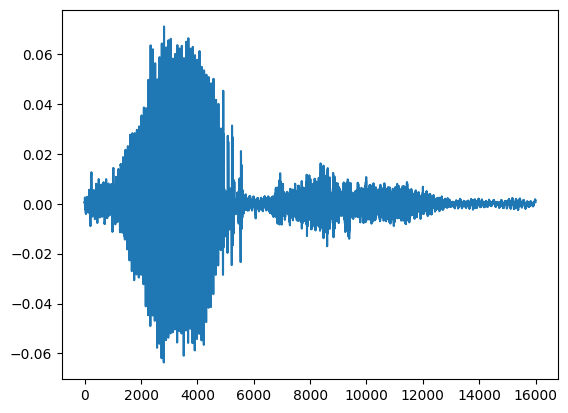

In [9]:
filename = "./data/SpeechCommands/speech_commands_v0.02/yes/00f0204f_nohash_0.wav"
waveform, sample_rate = plot_audio(filename)
ipd.Audio(waveform.numpy(), rate=sample_rate)

Next, let's look at the waveform and audio for the `no` command. As you can see, the waveform differs from the sound pattern for `yes`.

Shape of waveform: torch.Size([1, 16000])
Sample rate of waveform: 16000


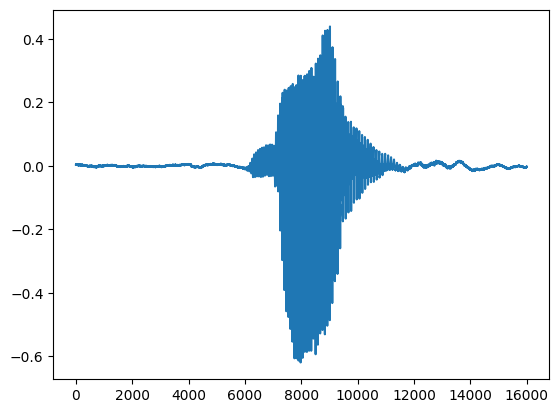

In [10]:
filename = "./data/SpeechCommands/speech_commands_v0.02/no/0b40aa8e_nohash_0.wav"
waveform, sample_rate = plot_audio(filename)
ipd.Audio(waveform.numpy(), rate=sample_rate)